Heart Failure Prediction 📚
Medical Real World Problem Statement :-

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide. Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

If you're able to make a machine learning model, then this will help in early detection and people can be saved.

You have to predict a person death event using some features:-

Age ,Gender , blood pressure, smoke, diabetes,ejection fraction, creatinine phosphokinase, serum_creatinine, serum_sodium, time
Dataset link:- https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

UCI ML:- https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Article:- https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5

Author of this notebook :- Waseem almazrua

###  Variables Table

| Variable Name             | Role    | Type       | Demographic | Description                                                  | Units              | Missing Values |
|---------------------------|---------|------------|-------------|--------------------------------------------------------------|--------------------|----------------|
| age                       | Feature | Integer    | Age         | Age of the patient                                           | years              | no             |
| anaemia                   | Feature | Binary     |             | Decrease of red blood cells or hemoglobin                   |                    | no             |
| creatinine_phosphokinase | Feature | Integer    |             | Level of the CPK enzyme in the blood                        | mcg/L              | no             |
| diabetes                  | Feature | Binary     |             | If the patient has diabetes                                 |                    | no             |
| ejection_fraction         | Feature | Integer    |             | Percentage of blood leaving the heart at each contraction   | %                  | no             |
| high_blood_pressure       | Feature | Binary     |             | If the patient has hypertension                             |                    | no             |
| platelets                 | Feature | Continuous |             | Platelets in the blood                                      | kiloplatelets/mL   | no             |
| serum_creatinine          | Feature | Continuous |             | Level of serum creatinine in the blood                      | mg/dL              | no             |
| serum_sodium              | Feature | Integer    |             | Level of serum sodium in the blood                          | mEq/L              | no             |
| sex                       | Feature | Binary     | Sex         | Woman or man                                                |                    | no             |
| smoking                   | Feature | Binary     |             | If the patient smokes or not                                |                    | no             |
| time                      | Feature | Integer    |             | Follow-up period                                            | days               | no             |
| death_event               | Target  | Binary     |             | If the patient died during the follow-up period             |                    |                |


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
df.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
def check_skew_kurtosis(df):
    """
    فحص الانحراف المعياري والتفلطح (لتحديد التوزيع الطبيعي).
    مفيد للكشف عن التوزيعات غير المتوازنة.
    """
    print("📐 Skewness (انحراف):")
    print(df.skew(numeric_only=True))
    print("\n📏 Kurtosis (تفلطح):")
    print(df.kurt(numeric_only=True))

In [7]:
check_skew_kurtosis(df)

📐 Skewness (انحراف):
age                         0.423062
anaemia                     0.278261
creatinine_phosphokinase    4.463110
diabetes                    0.333929
ejection_fraction           0.555383
high_blood_pressure         0.626732
platelets                   1.462321
serum_creatinine            4.455996
serum_sodium               -1.048136
sex                        -0.626732
smoking                     0.770349
time                        0.127803
DEATH_EVENT                 0.770349
dtype: float64

📏 Kurtosis (تفلطح):
age                         -0.184871
anaemia                     -1.935563
creatinine_phosphokinase    25.149046
diabetes                    -1.901254
ejection_fraction            0.041409
high_blood_pressure         -1.618076
platelets                    6.209255
serum_creatinine            25.828239
serum_sodium                 4.119712
sex                         -1.618076
smoking                     -1.416080
time                        -1.212048
DEATH_

In [8]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns='DEATH_EVENT')  
y = df['DEATH_EVENT']    

mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

mi_results = pd.Series(mi_scores, index=X.columns)
mi_results = mi_results.sort_values(ascending=False)

print(mi_results)


time                        0.240798
serum_creatinine            0.076126
ejection_fraction           0.061117
age                         0.047854
creatinine_phosphokinase    0.030779
serum_sodium                0.021283
smoking                     0.016590
high_blood_pressure         0.009862
anaemia                     0.000000
diabetes                    0.000000
platelets                   0.000000
sex                         0.000000
dtype: float64


<Axes: >

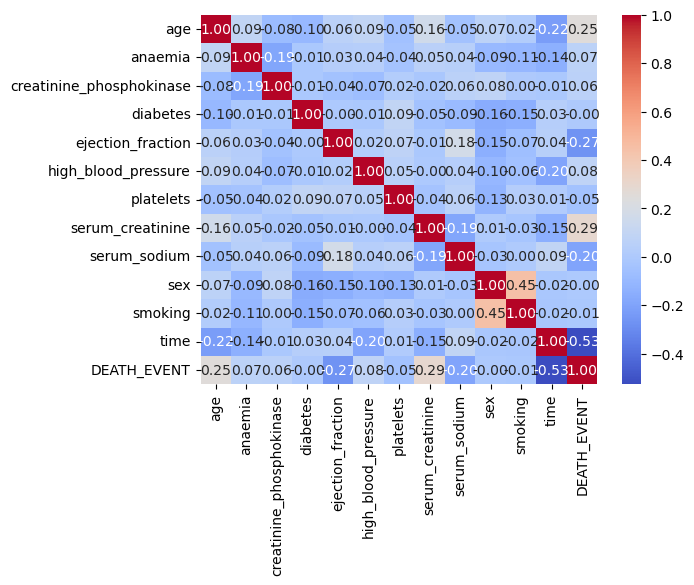

In [9]:
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm')

In [10]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline  
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')




X = df.drop(columns='DEATH_EVENT')  
y = df['DEATH_EVENT']    

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y,shuffle=True)

pip = Pipeline(steps=[
    ('scaler',StandardScaler()),
     ('smote',SMOTE(random_state=1)),
    ('model',XGBClassifier(use_label_encoder=False,eval_metric='logloss'))
])

params = {
    'model__learning_rate' : [0.0001,0.001,0.01,0.1],
    'model__max_depth' : [5,10,30,50,100,300,500,1000],
    'model__n_estimators' : [100,200,500,1000]
}


grid = GridSearchCV(pip,param_grid=params,scoring='accuracy')

grid.fit(X_train,y_train)


               


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=1)),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='logloss',
                                                      feature_types=None,
                                                      feature_weig...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'model__learning_rate': [0.0001, 0.001, 0.01, 0.1],
                         'model__max_depth': [5, 10, 30, 50, 100, 300, 500,
                                              1000],
                         'model__n_estimators': [100, 200, 500, 1000]},
             scoring='accuracy')

In [11]:
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters: {'model__learning_rate': 0.001, 'model__max_depth': 5, 'model__n_estimators': 1000}
Best CV Score: 0.8454787234042552


In [12]:
y_pred = grid.predict(X_test)


In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.8166666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        41
           1       0.67      0.84      0.74        19

    accuracy                           0.82        60
   macro avg       0.79      0.82      0.80        60
weighted avg       0.84      0.82      0.82        60



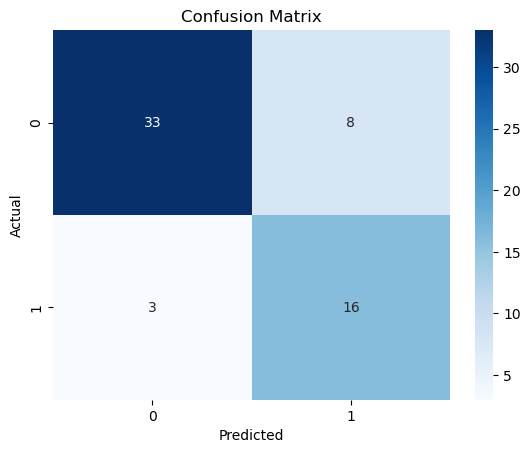

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [15]:
best_model = grid.best_estimator_


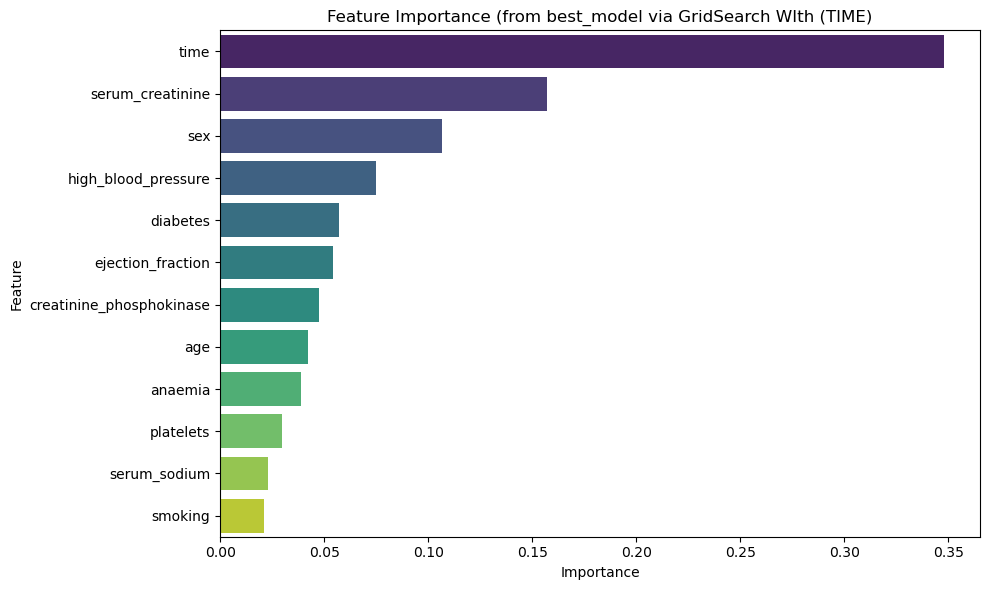

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


if hasattr(best_model, 'named_steps'):
    model = best_model.named_steps['model']  
else:
    model = best_model


importances = model.feature_importances_
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by="Importance", ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance (from best_model via GridSearch WIth (TIME)")
plt.tight_layout()
plt.savefig('feature importance with time.png',dpi=300)
plt.show()


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd


X = df.drop(columns=['DEATH_EVENT', 'time']) 
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


xgb_model = XGBClassifier(random_state=42)


pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', xgb_model)
])

param_grid = {
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 5, 10],
    'classifier__n_estimators': [100, 200]
}

grid = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

best_model_no_time = grid.best_estimator_
y_pred_best = best_model_no_time.predict(X_test)

print("Best Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nBest Model Report:\n", classification_report(y_test, y_pred_best))


Best Accuracy: 0.7166666666666667

Best Model Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80        41
           1       0.56      0.53      0.54        19

    accuracy                           0.72        60
   macro avg       0.67      0.67      0.67        60
weighted avg       0.71      0.72      0.71        60



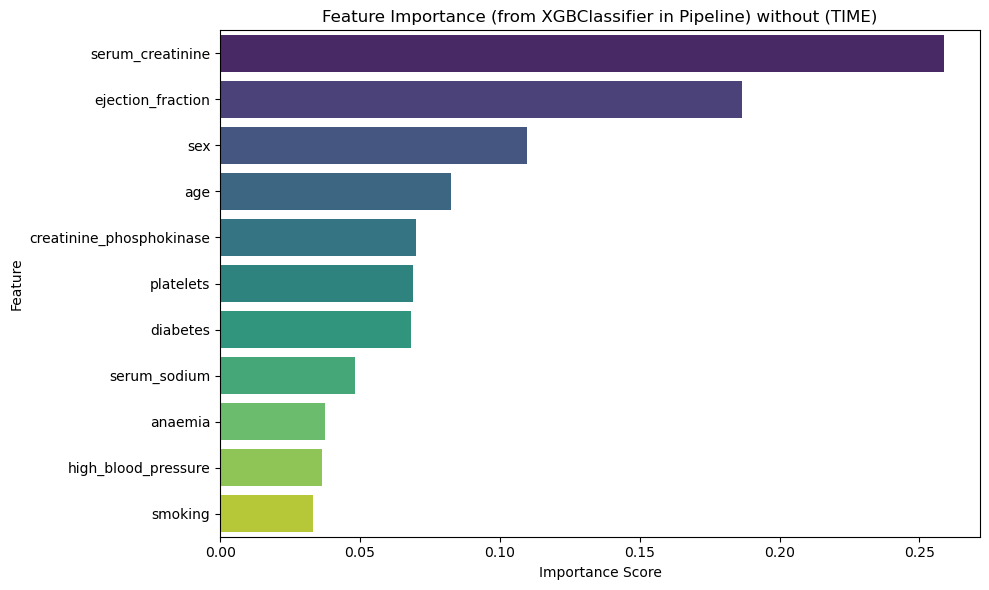

In [18]:
xgb_best_model = best_model_no_time.named_steps['classifier']

importances = xgb_best_model.feature_importances_
feature_names = X_train.columns 
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance (from XGBClassifier in Pipeline) without (TIME)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig('feature importance(without time).png',dpi=300)
plt.show()


In [19]:
from scipy.stats import ttest_ind



df = X.copy()
df['target'] = y


alive = df[df['target'] == 0]


dead = df[df['target'] == 1]


In [20]:
stat, p_value = ttest_ind(dead['serum_creatinine'], alive['serum_creatinine'], equal_var=False)

print("T-statistic:", stat)
print("P-value:", p_value)


T-statistic: 4.152639017521322
P-value: 6.398962339971595e-05


In [21]:
stat, p_value = ttest_ind(dead['ejection_fraction'], alive['ejection_fraction'], equal_var=False)

print("T-statistic:", stat)
print("P-value:", p_value)


T-statistic: -4.56698316342773
P-value: 9.647152798521775e-06
